In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("NASA GLOBAL LAND-OCEAN TEMPERATURE INDEX.csv")

dataset.head()

,year,Annual_mean,Lowess(5)
0,1880,-0.16,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.16
3,1883,-0.17,-0.20
4,1884,-0.28,-0.24


In [34]:
x = dataset.iloc[:, 0:1].values
y = dataset[['Annual_mean', 'Lowess(5)']]

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [36]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [37]:
print("Intercept: ", mlr.intercept_)
print("Coefficient:")
list(zip(x, mlr.coef_))

Intercept:  [-14.63110852 -14.14953735]
Coefficient:


[(array([1880], dtype=int64), array([0.00753695])),
 (array([1881], dtype=int64), array([0.00728599]))]

In [38]:
y_pred_mlr= mlr.predict(x_test)
print("Prediction set: {}".format(y_pred_mlr))

Prediction set: [[-1.14945572e-01 -1.16725813e-01]
 [ 4.57862519e-01  4.37009222e-01]
 [ 4.50325570e-01  4.29723234e-01]
 [ 4.05103879e-01  3.86007311e-01]
 [ 1.78995422e-01  1.67427692e-01]
 [ 3.59882188e-01  3.42291387e-01]
 [ 3.22197445e-01  3.05861450e-01]
 [ 3.07123548e-01  2.91289476e-01]
 [-1.82778110e-01 -1.82299699e-01]
 [ 6.01064542e-01  5.75442980e-01]
 [ 5.78453696e-01  5.53585019e-01]
 [ 5.64560473e-03 -1.50016286e-04]
 [-3.48590978e-01 -3.42591419e-01]
 [ 4.88010313e-01  4.66153171e-01]
 [ 3.82493033e-01  3.64149349e-01]
 [ 2.09143216e-01  1.96571641e-01]
 [ 4.80473365e-01  4.58867184e-01]
 [ 2.54364908e-01  2.40287565e-01]
 [-2.50610647e-01 -2.47873585e-01]
 [ 3.37271342e-01  3.20433425e-01]
 [ 5.84042447e-02  5.08518948e-02]
 [ 1.03625936e-01  9.45678186e-02]
 [ 5.10621159e-01  4.88011133e-01]
 [ 5.48305902e-01  5.24441069e-01]
 [-1.60167264e-01 -1.60441737e-01]
 [-3.78738772e-01 -3.71735369e-01]
 [ 3.90029982e-01  3.71435336e-01]
 [-2.43073698e-01 -2.40587597e-01]
 [ 1

In [33]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
46,1926,1920.581726
122,2002,2002.258800
121,2001,1999.010371
115,1995,1982.911801
85,1965,1937.720945


In [24]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 77.85
Mean Absolute Error: 0.14469540960463062
Mean Square Error: 0.028256803074913628
Root Mean Square Error: 0.16809759984875938


Text(0.5, 1.0, 'Actual vc Predicted')

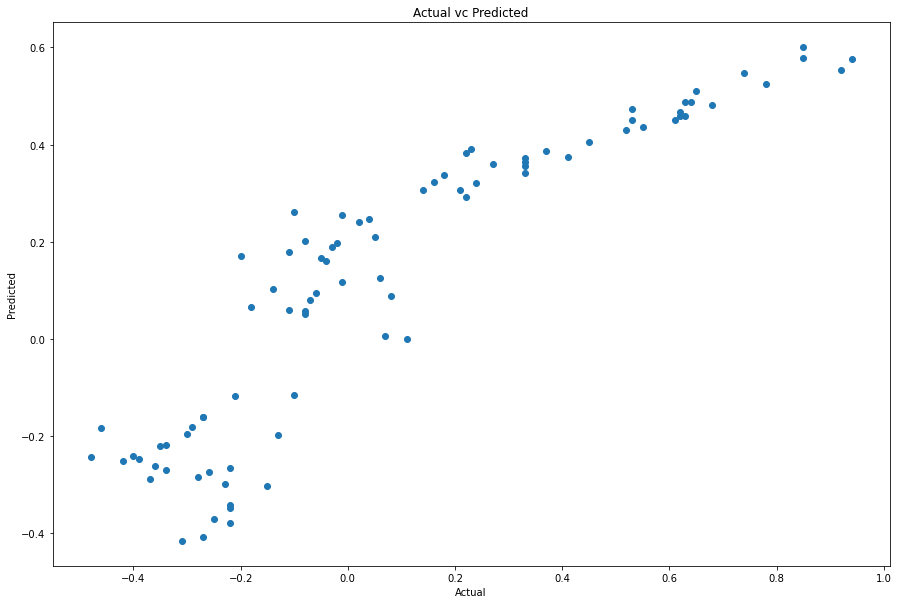

In [25]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_mlr)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vc Predicted')